# [de Boer+ 2019](https://ui.adsabs.harvard.edu/abs/2019MNRAS.485.4906D/abstract), [data](https://github.com/tdboer/GC_profiles/tree/f31e147c1ac2de11146d421f261cc620340ae9a9)

In [1]:
if "logger" in globals() and  len(logger.handlers) >= 1:
    # To suppress debug output from the logger defined in .ipython/profile_default/ipython_config.py
    logger.handlers.pop()

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import sys
import numpy
import logging
import numpy as np
import astropy.units as u
import astropy.constants as const
import astropy.coordinates as coord
import colorcet
import matplotlib
from matplotlib import pyplot
from matplotlib import pyplot as plt
pyplot.style.use("tlrh")

# This repo: src folder /w Python scripts
sys.path.append("../src")
# Other repos linked into the notebook container ;-)
sys.path.append("/supaharris")
from utils import convert_gc_names_from_sh_to_any
from data.parse_deBoer_2019 import parse_deBoer_2019_fits
from data.parse_deBoer_2019 import parse_deBoer_2019_member_stars
from data.parse_deBoer_2019 import parse_deBoer_2019_stitched_profiles
sys.path.append("/supaharris-client")
from supaharrisclient.units import arcmin2parsec
from supaharrisclient.units import parsec2arcmin
from supaharrisclient.utils import suppress_stdout
from supaharrisclient.client import SupaHarrisClient
sys.path.append("/auriga/src")
from mw_m31_gc_observations import read_MWandM31_data
MW_h96e10, MW_v13, M31_c11, M31_cr16 = read_MWandM31_data()
sys.path.append("/limepy")
import limepy

logging.basicConfig(stream=sys.stdout, format="%(message)s")
logger = logging.getLogger(); logger.level = logging.INFO
for h in logger.handlers: h.setLevel(logger.level)

In [3]:
deBoer_fits = parse_deBoer_2019_fits(logger)

print(deBoer_fits.shape)
print(deBoer_fits.dtype)
print(deBoer_fits["id"])

(81,)
[('id', '<U12'), ('W_lime', '<f8'), ('e_W_lime', '<f8'), ('g_lime', '<f8'), ('e_g_lime', '<f8'), ('rt_lime', '<f8'), ('e_rt_lime', '<f8'), ('M_lime', '<f8'), ('e_M_lime', '<f8'), ('W_pe', '<f8'), ('e_W_pe', '<f8'), ('eta_pe', '<f8'), ('e_eta_pe', '<f8'), ('log1minB_pe', '<f8'), ('e_log1minB_pe', '<f8'), ('rt_pe', '<f8'), ('e_rt_pe', '<f8'), ('M_pe', '<f8'), ('e_M_pe', '<f8'), ('W_king', '<f8'), ('e_W_king', '<f8'), ('rt_king', '<f8'), ('e_rt_king', '<f8'), ('M_king', '<f8'), ('e_M_king', '<f8'), ('W_wil', '<f8'), ('e_W_wil', '<f8'), ('rt_wil', '<f8'), ('e_rt_wil', '<f8'), ('M_wil', '<f8'), ('e_M_wil', '<f8'), ('log_fpe', '<f8'), ('e_log_fpe', '<f8'), ('chi2_king', '<f8'), ('chi2red_king', '<f8'), ('chi2_wil', '<f8'), ('chi2red_wil', '<f8'), ('chi2_lime', '<f8'), ('chi2red_lime', '<f8'), ('chi2_pe', '<f8'), ('chi2red_pe', '<f8'), ('kingtrunc', '<f8'), ('kinghalf', '<f8'), ('wiltrunc', '<f8'), ('wilhalf', '<f8'), ('limehalf', '<f8'), ('e_limehalf', '<f8'), ('pehalf', '<f8'), ('e_pe

In [4]:
deBoer_member_stars = parse_deBoer_2019_member_stars(logger)

print(len(deBoer_member_stars))
print(deBoer_member_stars["NGC 1261"].shape)
print(deBoer_member_stars["NGC 1261"].dtype)
print(deBoer_member_stars.keys())

81
(714,)
[('ra', '<f8'), ('dec', '<f8'), ('xi_gc', '<f8'), ('xn_gc', '<f8'), ('ellrad_gc', '<f8'), ('pmra', '<f8'), ('pmra_error', '<f8'), ('pmdec', '<f8'), ('pmdec_error', '<f8'), ('parallax', '<f8'), ('parallax_error', '<f8'), ('phot_g_mean_mag', '<f8'), ('phot_g_mean_mag_error', '<f8'), ('phot_bp_mean_mag', '<f8'), ('phot_bp_mean_mag_error', '<f8'), ('phot_rp_mean_mag', '<f8'), ('phot_rp_mean_mag_error', '<f8'), ('phot_bp_rp_excess_factor', '<f8'), ('Ag', '<f8'), ('Abp', '<f8'), ('Arp', '<f8'), ('pmra_pmdec_corr', '<f8'), ('source_id', '<f8'), ('prob', '<f8')]
dict_keys(['IC 1276', 'NGC 7006', 'NGC 7078', 'NGC 6624', 'NGC 5286', 'NGC 7089', 'NGC 2808', 'NGC 6333', 'NGC 362', 'NGC 6101', 'NGC 288', 'NGC 7492', 'NGC 5466', 'NGC 6779', 'NGC 6352', 'NGC 5904', 'NGC 6366', 'NGC 6388', 'IC 4499', 'NGC 6715', 'Pal 2', 'NGC 6426', 'NGC 3201', 'NGC 7099', 'NGC 5139', 'NGC 1851', 'NGC 1904', 'NGC 6864', 'NGC 6218', 'NGC 5272', 'NGC 6723', 'NGC 6496', 'NGC 4147', 'NGC 6362', 'NGC 6539', 'Pal 

In [5]:
deBoer_stitched_profiles = parse_deBoer_2019_stitched_profiles(logger)

print(len(deBoer_stitched_profiles))
print(deBoer_stitched_profiles["NGC 1261"].shape)
print(deBoer_stitched_profiles["NGC 1261"].dtype)
print(deBoer_stitched_profiles.keys())

81
(74,)
[('rad', '<f8'), ('density', '<f8'), ('density_err', '<f8')]
dict_keys(['NGC 288', 'IC 4499', 'NGC 6584', 'NGC 6121', 'NGC 6715', 'NGC 2419', 'NGC 6934', 'NGC 6273', 'NGC 6723', 'NGC 6809', 'NGC 5986', 'NGC 6541', 'NGC 6266', 'NGC 6284', 'NGC 6341', 'NGC 1851', 'NGC 6325', 'NGC 4147', 'Pal 11', 'NGC 7089', 'NGC 5904', 'NGC 6752', 'NGC 6205', 'NGC 5897', 'NGC 1904', 'NGC 6652', 'Pal 1', 'NGC 5024', 'Pal 8', 'NGC 6293', 'NGC 7006', 'NGC 6362', 'Terzan 8', 'NGC 6569', 'NGC 6496', 'NGC 6388', 'NGC 2298', 'NGC 5824', 'NGC 6366', 'NGC 1261', 'NGC 7492', 'NGC 104', 'NGC 6626', 'NGC 6779', 'NGC 5139', 'NGC 6144', 'NGC 6352', 'NGC 6717', 'NGC 5634', 'NGC 6171', 'NGC 6101', 'NGC 6624', 'NGC 6539', 'NGC 6864', 'IC 1276', 'NGC 6637', 'NGC 6333', 'NGC 6229', 'NGC 7078', 'NGC 5053', 'NGC 6402', 'NGC 6981', 'NGC 7099', 'NGC 6681', 'NGC 2808', 'NGC 5286', 'Pal 12', 'NGC 362', 'NGC 6397', 'NGC 5466', 'NGC 6139', 'NGC 6235', 'NGC 6656', 'NGC 6218', 'NGC 4590', 'NGC 3201', 'NGC 6426', 'NGC 6254'

In [6]:
pmra = deBoer_member_stars["NGC 1261"]["pmra"]
pmdec = deBoer_member_stars["NGC 1261"]["pmdec"]
prob = deBoer_member_stars["NGC 1261"]["prob"]

# Reproduce Figure 1 - note that this is for NGC 1904

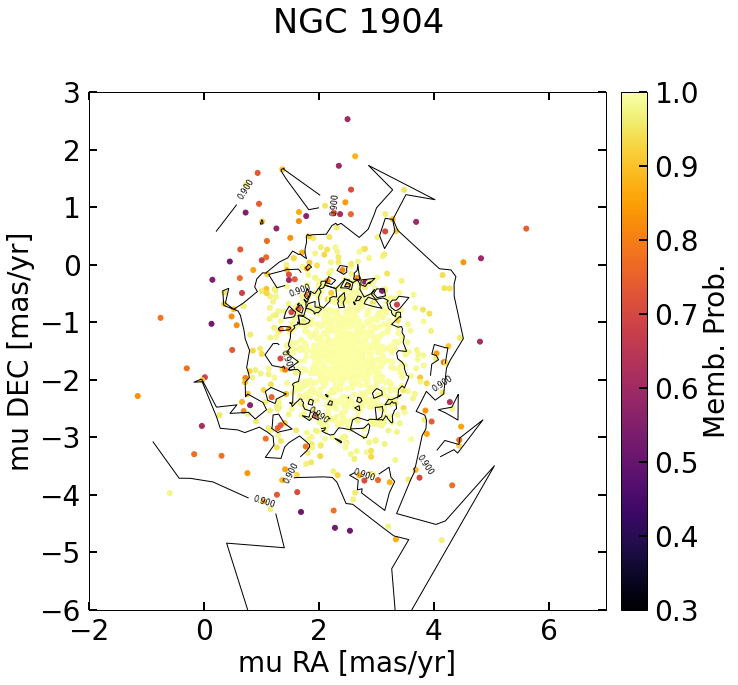

In [7]:
pyplot.rcParams["text.usetex"] = False
from mpl_toolkits.axes_grid1 import make_axes_locatable

gc_name = "NGC 1904"

# fig, ax = pyplot.subplots(1, 1, figsize=(10, 10))
# ax.plot(deBoer_member_stars[gc_name]["ra"], deBoer_member_stars[gc_name]["dec"], "kD", ms=4)
# ax.set_xlabel("RA [deg]")
# ax.set_ylabel("DEC [deg]")
# ax.set_aspect(1)
# pyplot.show(fig)


fig, ax = pyplot.subplots(1, 1, figsize=(10, 10))
fig.suptitle(gc_name)
scatter = pyplot.scatter(
    deBoer_member_stars[gc_name]["pmra"],
    deBoer_member_stars[gc_name]["pmdec"],
    c=deBoer_member_stars[gc_name]["prob"],
    vmin=0.3, vmax=1.0, s=25, cmap="inferno"
)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
cax = pyplot.colorbar(ax=ax, cax=cax)
cax.ax.set_ylabel("Memb. Prob.")

contours = ax.tricontour(
    deBoer_member_stars[gc_name]["pmra"],
    deBoer_member_stars[gc_name]["pmdec"],
    deBoer_member_stars[gc_name]["prob"],
    colors="black", linestyles="-", levels=[0.90, 0.99],
    antialiased=True
)
ax.clabel(contours, inline=True, fontsize=8)

# ax.set_xlabel("$\mu_{\\text RA}$ [mas/yr]")
# ax.set_ylabel("$\mu_{\\text DEC}$ [mas/yr]")
ax.set_xlabel("mu RA [mas/yr]")
ax.set_ylabel("mu DEC [mas/yr]")
ax.set_xlim(-2, 7)
ax.set_ylim(-6, 3)
ax.set_aspect(1)


# pyplot.tight_layout()
pyplot.show(fig)

# Reproduce Figure 6

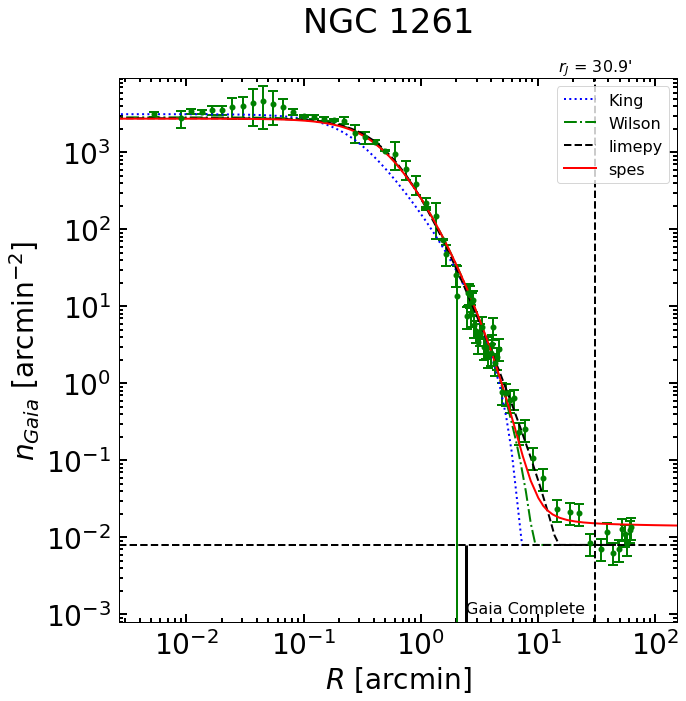

In [8]:
from data.parse_deBoer_2019 import plot_deBoer_2019
from data.parse_balbinot_2018 import parse_balbinot_2018
from data.parse_harris_1996ed2010 import parse_harris1996ed2010


h96_gc = parse_harris1996ed2010(logger)["NGC 1261"]
b18 = parse_balbinot_2018(logger)
imatch, = numpy.where(b18["Name"] == "NGC 1261")[0]
b18 = b18[imatch]

distance_kpc = h96_gc.dist_from_sun
rJ_pc = b18["r_J"]
rJ = parsec2arcmin(rJ_pc, distance_kpc)

for i, fit in enumerate(deBoer_fits):
    if fit["id"] != "NGC 1261": continue
    fig, ax = pyplot.subplots(1, 1, figsize=(10, 10))
    fig = plot_deBoer_2019(logger, fit, deBoer_stitched_profiles["NGC 1261"],
        distance_kpc, rJ_pc, rJ, fig=fig, has_tex=False)
    pyplot.show(fig)

# List all of the GCs for which we have deBoer2019 density profiles 

In [9]:
from mw_gc_observation import MwGcObservation
for gc_name in deBoer_fits["id"]:
    print("\"{0}\"".format(gc_name))
    obs = MwGcObservation(logger, gc_name)

"NGC 104"
"NGC 288"
"NGC 362"
"NGC 1261"
"Pal 1"
"NGC 1851"
"NGC 1904"
"NGC 2298"
"NGC 2419"
"NGC 2808"
"NGC 3201"
"NGC 4147"
"NGC 4590"
"NGC 5024"
"NGC 5053"
"NGC 5139"
"NGC 5272"
"NGC 5286"
"NGC 5466"
"NGC 5634"
"NGC 5694"
"IC 4499"
"NGC 5824"
"NGC 5897"
"NGC 5904"
"NGC 5986"
"NGC 6093"
"NGC 6121"
"NGC 6101"
"NGC 6144"
"NGC 6139"
"NGC 6171"
"NGC 6205"
"NGC 6229"
"NGC 6218"
"NGC 6235"
"NGC 6254"
"NGC 6266"
"NGC 6273"
"NGC 6284"
"NGC 6293"
"NGC 6341"
"NGC 6325"
"NGC 6333"
"NGC 6352"
"NGC 6366"
"NGC 6362"
"NGC 6388"
"NGC 6402"
"NGC 6397"
"NGC 6426"
"NGC 6496"
"NGC 6539"
"NGC 6541"
"IC 1276"
"NGC 6569"
"NGC 6584"
"NGC 6624"
"NGC 6626"
"NGC 6637"
"NGC 6652"
"NGC 6656"
"Pal 8"
"NGC 6681"
"NGC 6715"
"NGC 6717"
"NGC 6723"
"NGC 6752"
"NGC 6779"
"NGC 6809"
"Terzan 8"
ERROR: Terzan 8 not in H19 orbits
"Pal 11"
"NGC 6864"
"NGC 6934"
"NGC 6981"
"NGC 7006"
"NGC 7078"
"NGC 7089"
"NGC 7099"
"Pal 12"
"NGC 7492"
